In [19]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# find B for u
def get_B(i, p, cur_u, arr_u):
    if p == 0:
        if arr_u[i] <= cur_u < arr_u[i + 1]:
            return 1.0
        else:
            return 0.0
    else:
        sum = 0
        try:
            b = get_B(i, p - 1, cur_u, arr_u)
            val1 = (cur_u - arr_u[i]) / (arr_u[i + p] - arr_u[i]) * b
            sum += val1
        except:
            sum = 0

        try:
            b = get_B(i + 1, p - 1, cur_u, arr_u)
            val2 = (arr_u[i + p + 1] - cur_u) / (arr_u[i + p + 1] - arr_u[i + 1]) * b
            sum += val2
        except:
            pass

        return sum

In [21]:
# draw surface for 4 points
def count_for_points(points_x, points_y, points_z):
    u = 0.0
    surface_x = np.empty(0)
    surface_y = np.empty(0)
    surface_z = np.empty(0)
    while u <= 1.0:
        v = 0.0
        while v <= 1.0:
            count_top_x = 0.0
            count_top_y = 0.0
            count_top_z = 0.0
            count_down = 0.0
            for i in range(2):
                for j in range(2):
                    Bip = get_B(i, pol_order, u, U)
                    Bjp = get_B(j, pol_order, v, V)
                    count_top_x += Bip * Bjp * points_x[i * 2 + j]
                    count_top_y += Bip * Bjp * points_y[i * 2 + j]
                    count_top_z += Bip * Bjp * points_z[i * 2 + j]
                    count_down += Bip * Bjp

            if count_down != 0:
                surface_x = np.append(surface_x, count_top_x/count_down)
                surface_y = np.append(surface_y, count_top_y/count_down)
                surface_z = np.append(surface_z, count_top_z/count_down)
            v += 0.01

        u += 0.01
    ax.plot3D(surface_x, surface_y, surface_z, linewidth=2)

In [22]:
x = [1, 2, 3, 4, 5, 6, 7, 9]
y = [1, 5, 2, 4, 1, 1, 1, 1]
z = [1, 0, 2, 1, 2, 0, 3, 3]

In [23]:
pol_order = 4
# knot vectors:
U = V = [0.0, 0.0, 1.0/4.0, 2.0/4.0, 3.0/4.0, 1.0, 1.0]

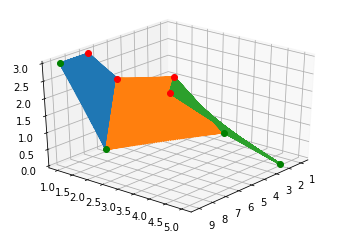

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30, 40)
temp_p1_x, temp_p1_y, temp_p1_z = x[0::2], y[0::2], z[0::2]
temp_p2_x, temp_p2_y, temp_p2_z = x[1::2], y[1::2], z[1::2]

count_for_points(x[4:8], y[4:8], z[4:8])
count_for_points(x[2:6], y[2:6], z[2:6])
count_for_points(x[0:4], y[0:4], z[0:4])

p1, = ax.plot3D(temp_p1_x, temp_p1_y, temp_p1_z, 'ro')
p2, = ax.plot3D(temp_p2_x, temp_p2_y, temp_p2_z, 'go')
plt.show()